In [2]:
print("hellowworls")

hellowworls


In [3]:
import time
print("hello world")

hello world


In [4]:
!pip install tensorflow opencv-python matplotlib seaborn scikit-learn



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [50]:
img_size = (224, 224)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

train_data = datagen.flow_from_directory(
    "dataset",
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="training",
    shuffle=True
)

val_data = datagen.flow_from_directory(
    "dataset",
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation",
    shuffle=False   # IMPORTANT for correct evaluation
)

print("Class indices:", train_data.class_indices)


Found 1680 images belonging to 3 classes.


Found 419 images belonging to 3 classes.
Class indices: {'paper': 0, 'rock': 1, 'scissors': 2}


In [51]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False  # freeze pretrained features

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_6      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,339 (9.24 MB)

 Trainable params: 164,355 (642.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [52]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)


Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.9077 - loss: 0.2499 - val_accuracy: 0.9833 - val_loss: 0.0438
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 49s 925ms/step - accuracy: 0.9750 - loss: 0.0766 - val_accuracy: 0.9857 - val_loss: 0.0381
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 46s 872ms/step - accuracy: 0.9821 - loss: 0.0572 - val_accuracy: 0.9928 - val_loss: 0.0265
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 47s 889ms/step - accuracy: 0.9869 - loss: 0.0495 - val_accuracy: 0.9952 - val_loss: 0.0223
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 47s 892ms/step - accuracy: 0.9887 - loss: 0.0346 - val_accuracy: 0.9976 - val_loss: 0.0095
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 48s 907ms/step - accuracy: 0.9935 - loss: 0.0250 - val_accuracy: 0.9905 - val_loss: 0.0149
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 47s 885ms/step - accuracy: 0.9917 - loss: 0.0254 - val_accuracy: 0.9976 - val_loss: 0.0090
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 46s 868ms/step - accuracy: 0.9911 - loss: 0.0283 - val_accurac

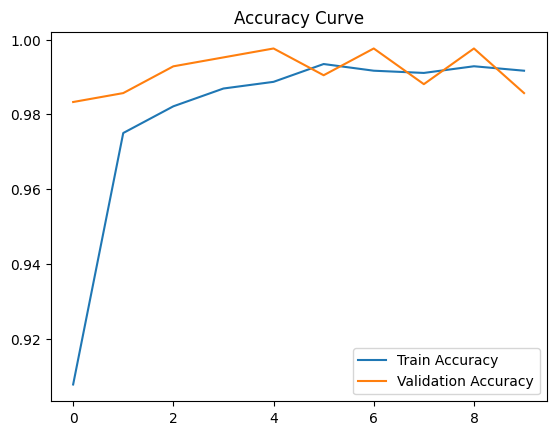

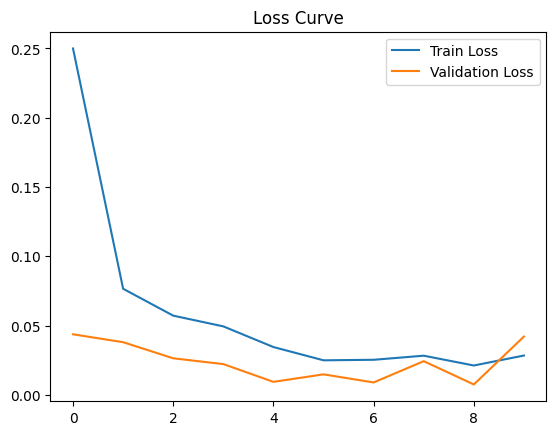

In [53]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy Curve")
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss Curve")
plt.show()


14/14 ━━━━━━━━━━━━━━━━━━━━ 16s 942ms/step
              precision    recall  f1-score   support

       paper       0.97      1.00      0.99       142
        rock       1.00      1.00      1.00       145
    scissors       1.00      0.97      0.98       132

    accuracy                           0.99       419
   macro avg       0.99      0.99      0.99       419
weighted avg       0.99      0.99      0.99       419



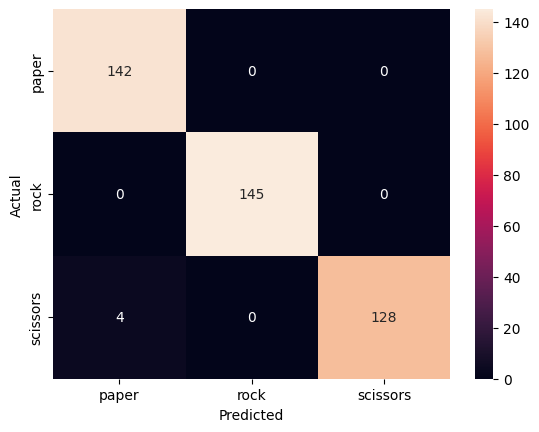

In [54]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_true = val_data.classes
y_pred = np.argmax(model.predict(val_data), axis=1)

print(classification_report(y_true, y_pred, target_names=val_data.class_indices.keys()))

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=val_data.class_indices.keys(),
            yticklabels=val_data.class_indices.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [55]:
from tensorflow.keras.preprocessing import image

def predict_gesture(img_path):
    img = image.load_img(img_path, target_size=(224,224))
    img = image.img_to_array(img)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)

    pred = model.predict(img)
    class_names = list(train_data.class_indices.keys())
    predicted_class = class_names[np.argmax(pred)]
    confidence = np.max(pred)

    return predicted_class, confidence

pred, conf = predict_gesture(r"C:\Users\DELL\OneDrive\Desktop\ROCK PAPER SCISSOR\pranav hand.jpeg")
print("Prediction:", pred)
print("Confidence:", conf)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Prediction: rock
Confidence: 0.999951


In [21]:
train_gen = datagen.flow_from_directory(r"C:\Users\DELL\OneDrive\Desktop\ROCK PAPER SCISSOR\Dataset")
print(train_gen.class_indices)


Found 2099 images belonging to 3 classes.
{'paper': 0, 'rock': 1, 'scissors': 2}
